In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
#warnings.filterwarnings("ignore")

In [46]:
df = pd.read_csv("/home/hala/Downloads/train.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


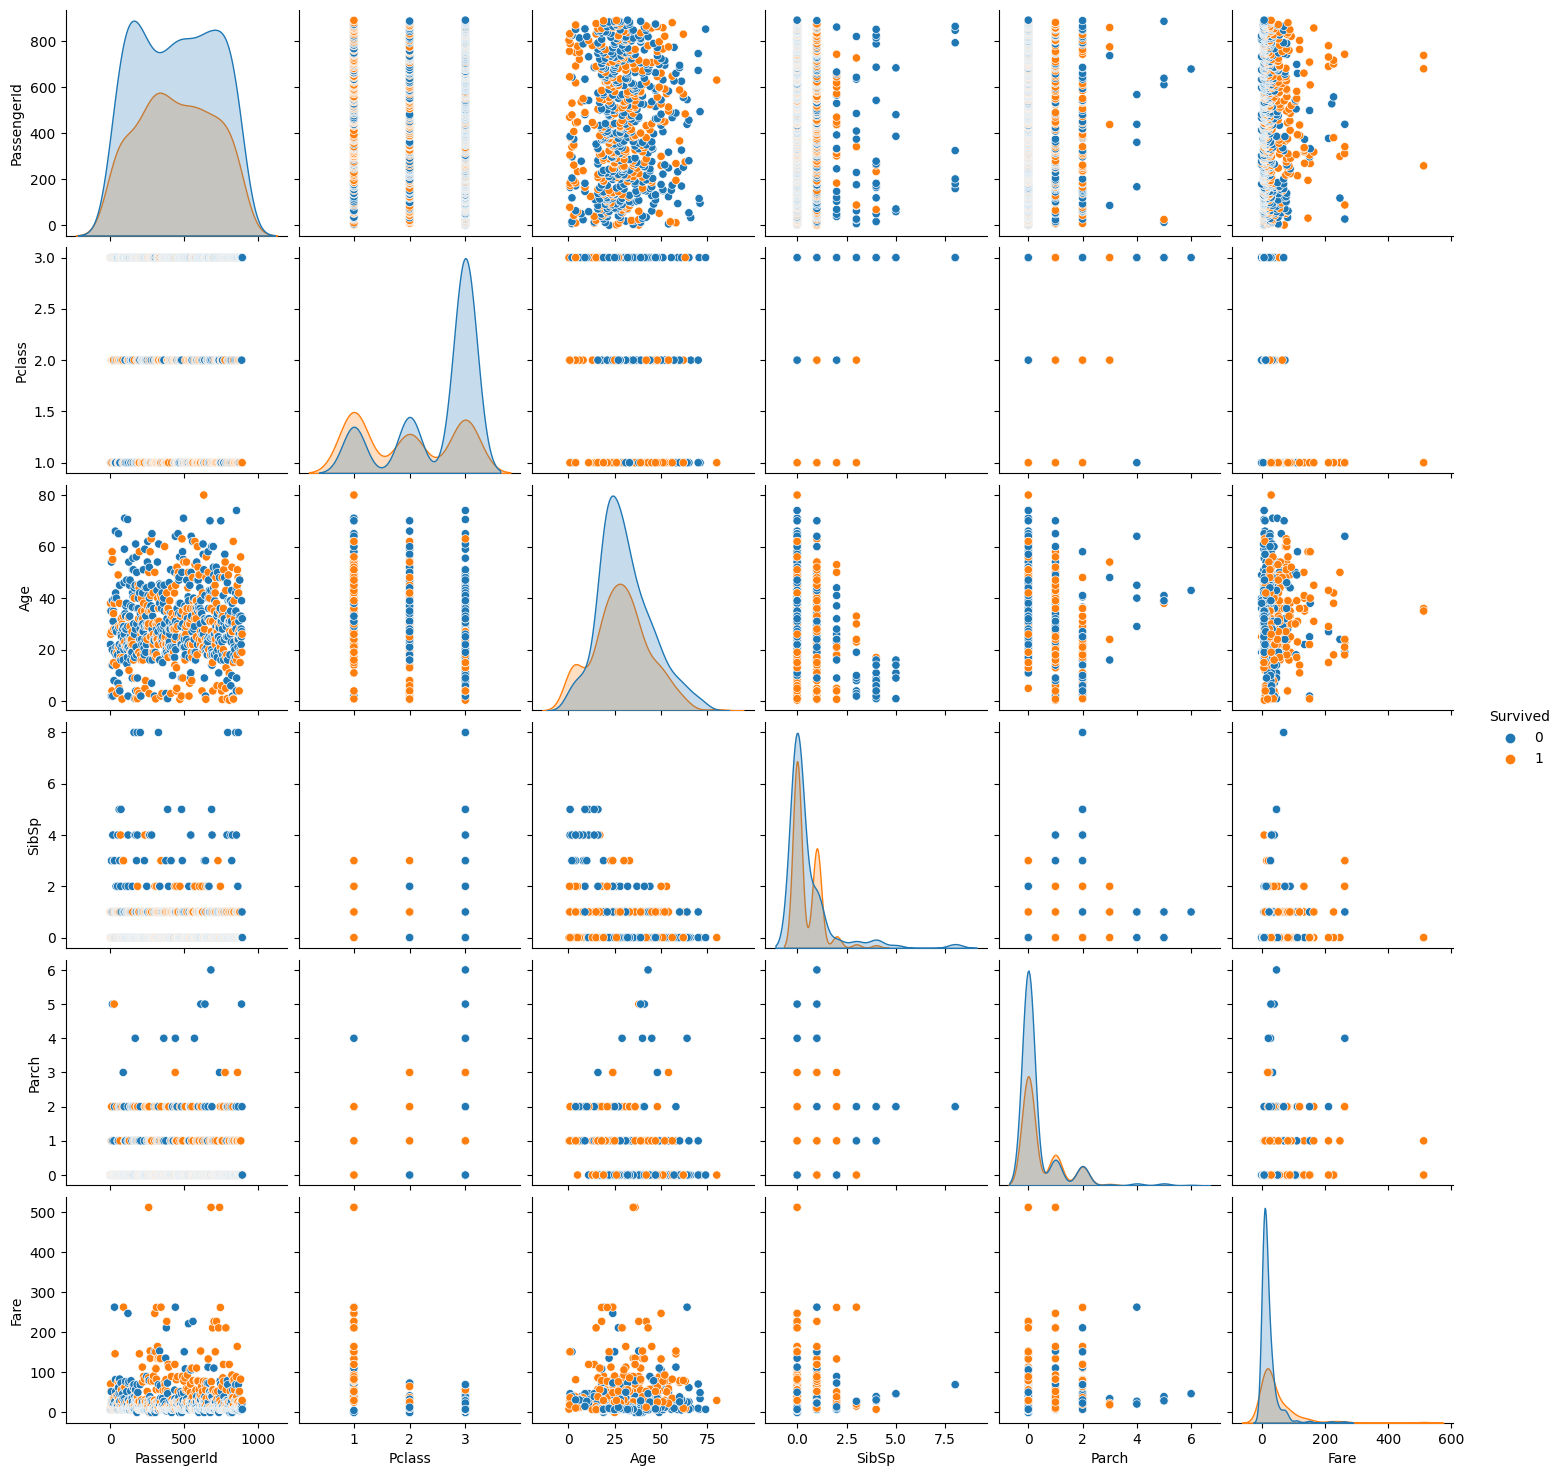

In [31]:
sns.pairplot(data=df,hue='Survived')

In [48]:
#Handling Embarked feature

df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)



29.69911764705882

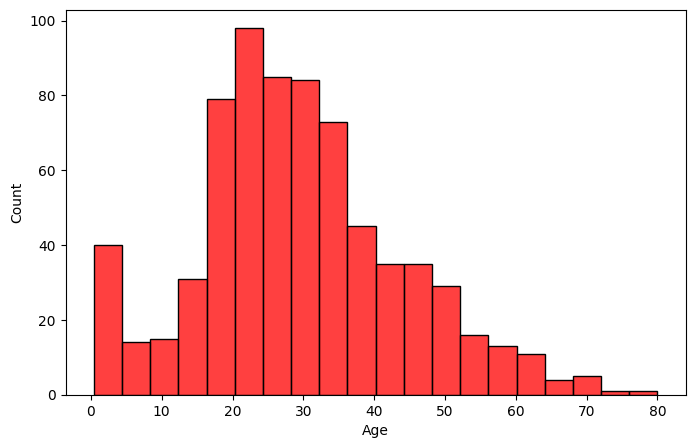

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(),color='red')
df['Age'].dropna().mean()

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.distplot(df['Fare'],bins=30 ,kde=False,color='red')

In [50]:
#Capturing nan with new feature
df['Age_nan'] = np.where(df['Age'].isnull,0,1)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked       891
Age_nan          0
Age_mean         0
dtype: int64


<AxesSubplot: xlabel='Age_mean', ylabel='Count'>

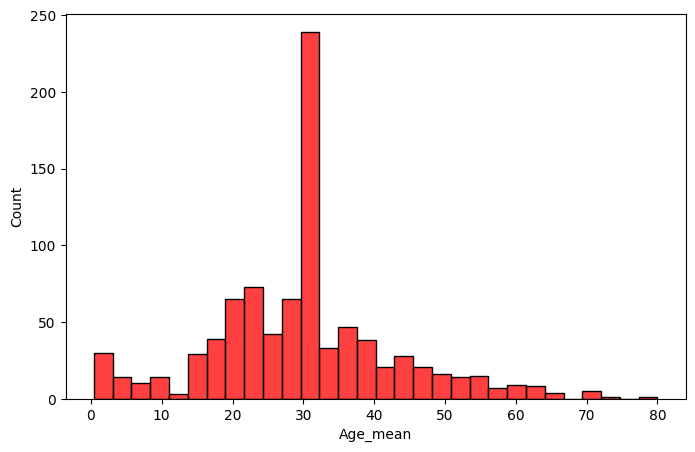

In [51]:
df['Age_mean']=df['Age'].fillna(df.Age.mean())
print(df.isnull().sum())
plt.figure(figsize=(8,5))
sns.histplot(df['Age_mean'],color='red')

In [52]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
data_with_null=df[['Survived' ,'Pclass','SibSp','Parch','Fare','Age']]
data_without_null=data_with_null.dropna()
train=data_without_null.iloc[:,:5]
target=data_without_null.iloc[:,5]
lin.fit(train,target)
test=data_with_null.iloc[:,:5]
pridect_Age=pd.DataFrame(lin.predict(test))
data_with_null.Age.fillna(pridect_Age[0] ,inplace=True)

In [53]:
df['pridect_Age']=data_with_null.Age
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_nan,Age_mean,pridect_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,None,0,22.000000,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,None,0,38.000000,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,None,0,26.000000,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,None,0,35.000000,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,None,0,35.000000,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,None,0,27.000000,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,None,0,19.000000,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,None,0,29.699118,23.301264
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,None,0,26.000000,26.000000


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked       891
Age_nan          0
Age_mean         0
pridect_Age      0
dtype: int64



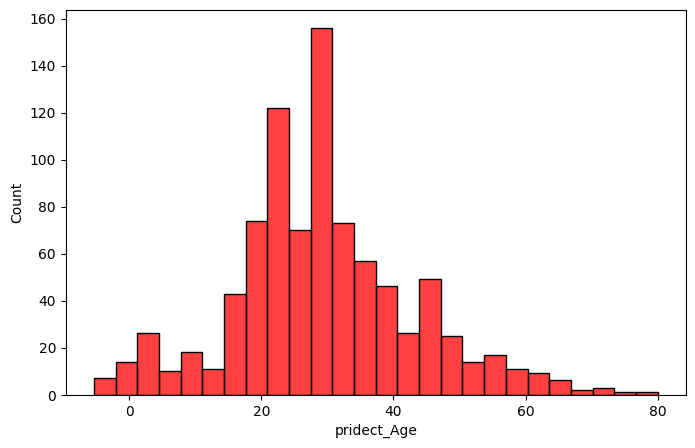

In [54]:
print(df.isnull().sum())
plt.figure(figsize=(8,5))
sns.histplot(df['pridect_Age'],color='red')
print()

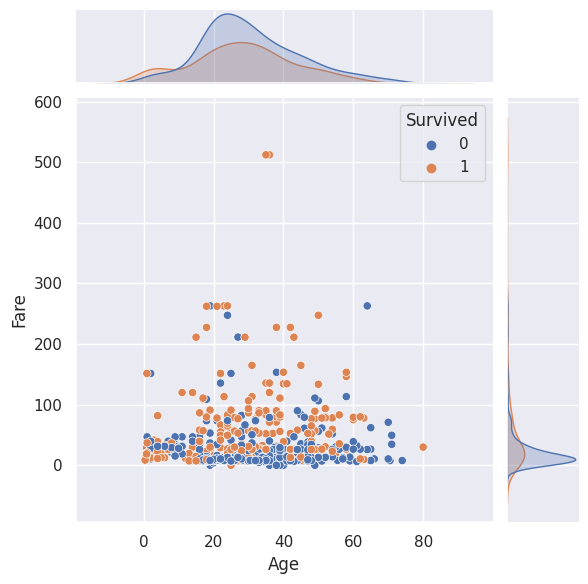

In [19]:
sns.jointplot(data=df,x='Age',y='Fare',hue='Survived')

<AxesSubplot: xlabel='SibSp', ylabel='Count'>

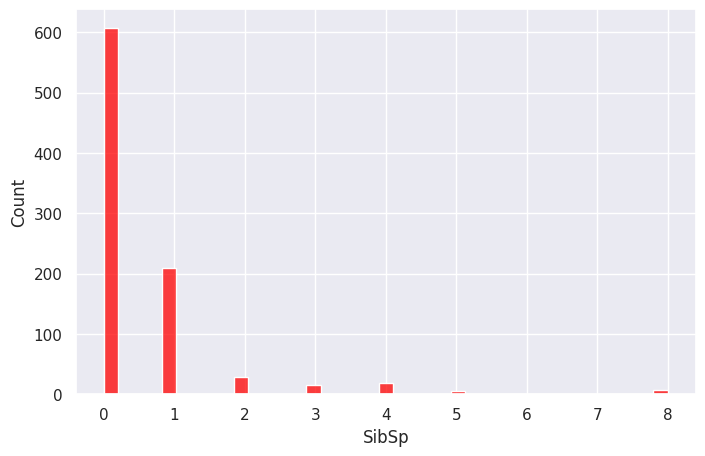

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['SibSp'],color='red')

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

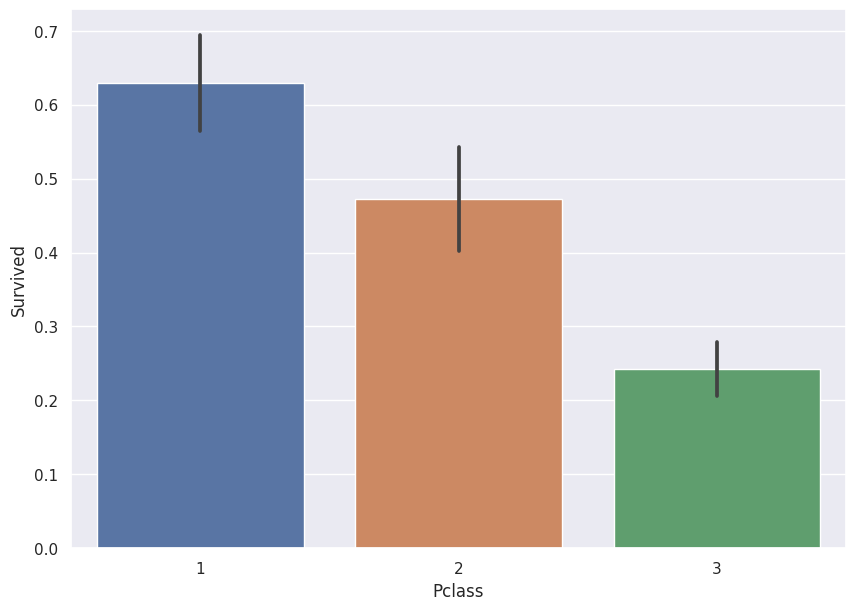

In [22]:
plt.figure(figsize=(10,7))
sns.barplot(data=df,x='Pclass',y='Survived')


<AxesSubplot: xlabel='Parch', ylabel='Count'>

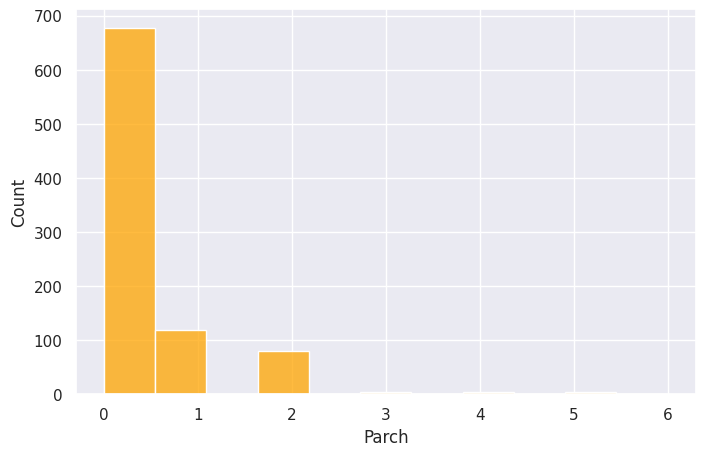

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['Parch'],color='orange')

<AxesSubplot: xlabel='Age', ylabel='Count'>

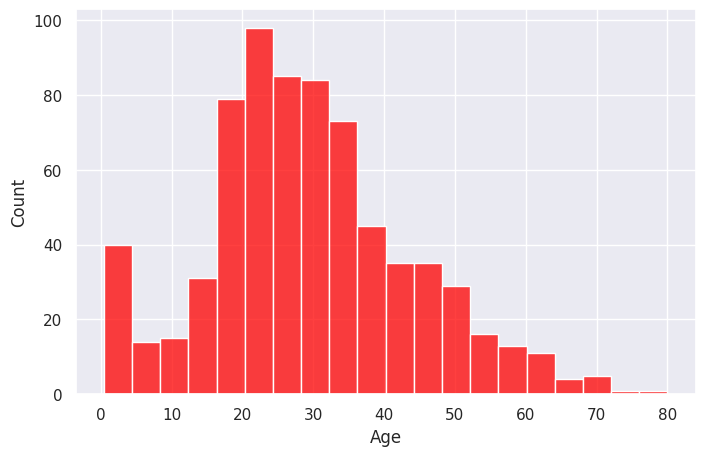

In [58]:

plt.figure(figsize=(12,7))
sns.barplot(data=df,x='Sex',y='Survived',hue='Pclass')



<AxesSubplot: >

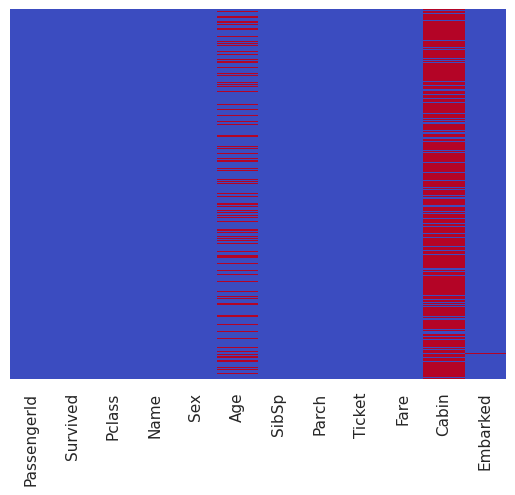

In [24]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='coolwarm')



<AxesSubplot: xlabel='Pclass', ylabel='Age'>

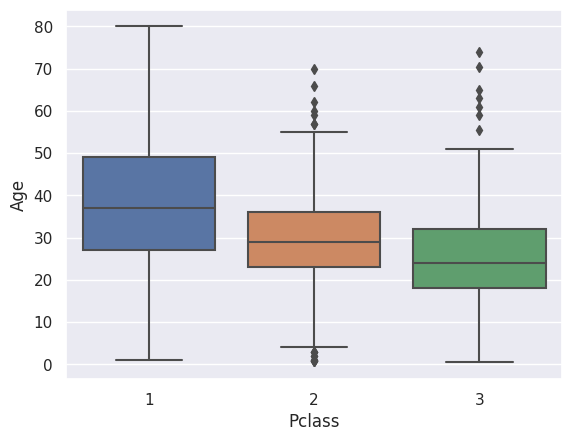

In [26]:
sns.boxplot(data=df,y='Age',x='Pclass')

In [22]:
df['Age_mean']=df['Age'].fillna(df['Age'].mean())

In [60]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [38]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
data_with_null=df[['Survived' ,'Pclass','SibSp','Parch','Fare','Age']]
data_without_null=data_with_null.dropna()
train=data_without_null.iloc[:,:5]
target=data_without_null.iloc[:,5]
lin.fit(train,target)
test=data_with_null.iloc[:,:5]
pridect_Age=pd.DataFrame(lin.predict(test))


,0
0,25.126883
1,33.453537
2,22.330078
3,33.724737
4,29.109740
...,...
886,37.067524
887,38.064058
888,23.301264
889,38.064058


In [41]:
data_with_null.Age.fillna(pridect_Age[0] ,inplace=True)

In [40]:
data_with_null

,Survived,Pclass,SibSp,Parch,Fare,Age
0,0,3,1,0,7.2500,22.000000
1,1,1,1,0,71.2833,38.000000
2,1,3,0,0,7.9250,26.000000
3,1,1,1,0,53.1000,35.000000
4,0,3,0,0,8.0500,35.000000
...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000
887,1,1,0,0,30.0000,19.000000
888,0,3,1,2,23.4500,23.301264
889,1,1,0,0,30.0000,26.000000


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
age              0
dtype: int64

In [17]:
df.age.mean()

29.30766637123747

<AxesSubplot: xlabel='age', ylabel='Count'>

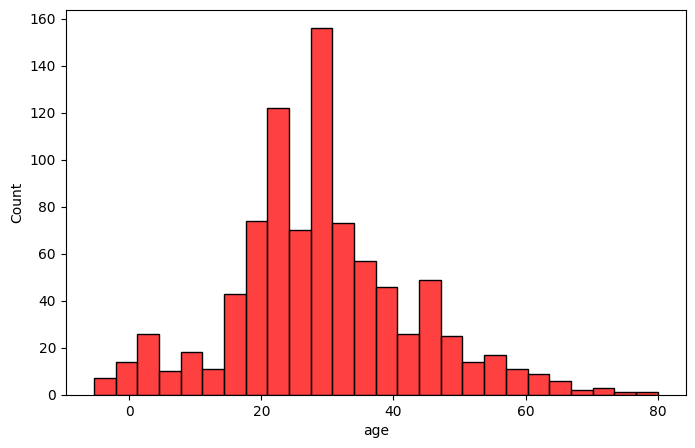

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'],color='red')

In [72]:
pd.set_option("display.max_rows", None)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


<AxesSubplot: xlabel='age', ylabel='Count'>

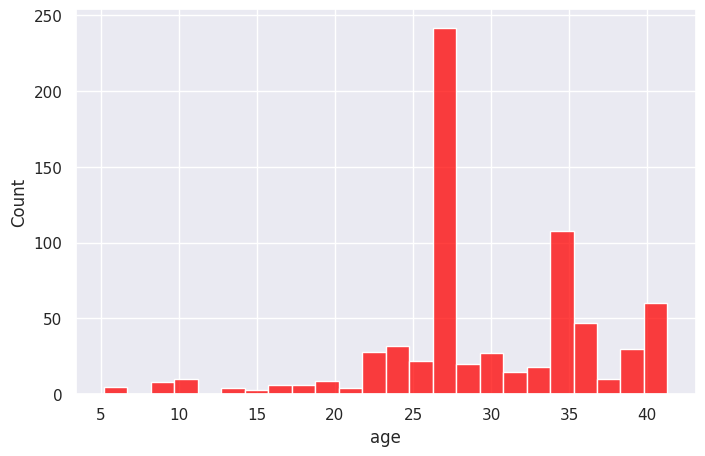

In [51]:


plt.figure(figsize=(8,5))
sns.histplot(df['age'].dropna(),color='red')



29.69911764705882

In [50]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
age            177
dtype: int64